## Is it a portrait or a street photo?

In [88]:
import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [89]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

In 2015 the idea of creating a computer system that could recognise birds was considered so outrageously challenging that it was the basis of [this XKCD joke](https://xkcd.com/1425/):

But today, we can do exactly that, in just a few minutes, using entirely free resources!

The basic steps we'll take are:

1. Use DuckDuckGo to search for images of "bird photos"
1. Use DuckDuckGo to search for images of "forest photos"
1. Fine-tune a pretrained neural network to recognise these two groups
1. Try running this model on a picture of a bird and see if it works.

## Step 1: Download images of street photographs and use portrait dataset

In [90]:
from duckduckgo_search import DDGS
from fastcore.all import *

# Using lite backend and limit the number of results
from itertools import islice

ddgs = DDGS()

def search_images(term, max_images = 136):
    print(f"searching for '{term}'")
    keywords = term
    ddgs_images = ddgs.images(keywords)
    limited_images = list(islice(ddgs_images, max_images))
    return L(limited_images).itemgot('image')

urls = search_images('flickr black and white street scene photography')
len(urls)

searching for 'flickr black and white street scene photography'


136

In [91]:
#download 2 streets
urls = search_images('flickr black and white street scene photography', max_images=2)
urls[0]

searching for 'flickr black and white street scene photography'


'https://get.pxhere.com/photo/pedestrian-black-and-white-people-road-street-photography-alley-city-urban-nikon-black-monochrome-flickr-bw-2016-candid-infrastructure-photograph-snapshot-streetart-ch-schweiz-switzerland-strasse-zurich-blancoynegro-streetphoto-snapseed-schwarzundweiss-observer-personen-passanten-streetpix-thomas8047-onthestreets-iamnikon-d300s-blackandwithe-stadtansichten-streetphotographer-streetartstreetlife-hofmanntmecom-175528-strassencene-langstrasse-kreis4-zurichstreets-z-ri-z-rigrafien-stadtz-rich-rotlichtviertel-beobachter-urban-area-monochrome-photography-nonbuilding-structure-389039.jpg'

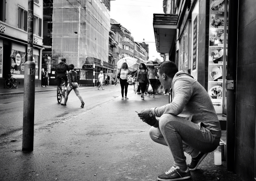

In [92]:
#save one street from search
from fastdownload import download_url
from fastai.vision.all import *

dest = 'street.jpg'
download_url(urls[0], dest, show_progress=False)


im = Image.open(dest)
im.to_thumb(256,256)

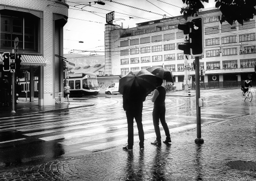

In [93]:
#save one street from search
from fastdownload import download_url
dest = 'street1.jpg'
download_url(urls[1], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

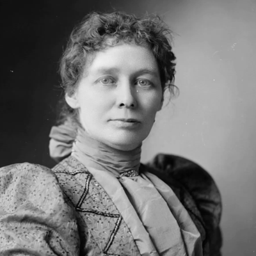

In [94]:
#save one portrait from dataset
from pathlib import Path
from PIL import Image

inputpath = Path('/kaggle/input/oldfaces1024')
image_files = get_image_files(inputpath)

img = Image.open(file)
img = img.resize((400, 400))
dest='portrait.png'
img.save(dest)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)


...and then download a URL and take a look at it:

Looks like DuckDuckGo Search package api changed a bit, you'll need to do this to search for images and cap the number of URLs you get back:

Let's start by searching for a black and white street photography and seeing what kind of result we get. We'll start by getting URLs from a search:

...and then download a URL and take a look at it:

Now let's do the same with "forest photos":

Our searches seem to be giving reasonable results, so let's grab a few examples of each of "bird" and "forest" photos, and save each group of photos to a different folder (I'm also trying to grab a range of lighting conditions here):

In [95]:
#move dataset images to folder after resizing
from pathlib import Path
from PIL import Image

inputpath = Path('/kaggle/input/oldfaces1024')
image_files = get_image_files(inputpath)

path = Path('portrait_or_street')
dest_path = (path/Path('portrait'))
dest_path.mkdir(exist_ok=True, parents=True)

for file in image_files:
    img = Image.open(file)
    # do something with img
    img = img.resize((400, 400))
    #dest = dest_path/file.name
    #img2 = Image
    dest = dest_path / file.name
    img.save(dest)
    print(f"DONE")

DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE
DONE


In [96]:
#ILP works
from fastdownload import download_url
from time import sleep

searches = 'flickr black and white street scene','flickr black and white street scene'
path = Path('portrait_or_street')

for o in searches:
    dest = (path/Path('street'))
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photography'))
    #sleep(10)  # Pause between searches to avoid over-loading server
    #download_images(dest, urls=search_images(f'{o} sun photo'))
    #sleep(10)
    #download_images(dest urls=search_images(f'{o} shade photo'))
    #sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)
    print(f"DONE")

searching for 'flickr black and white street scene photography'
DONE
searching for 'flickr black and white street scene photography'
DONE


In [ ]:
#n/a
import os
folder_path = '/kaggle/working/portrait_or_street/flickr black and white street scene'
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    if os.path.isfile(file_path):
        os.remove(file_path)
os.rmdir(folder_path)

## Step 2: Train our model

Some photos might not download correctly which could cause our model training to fail, so we'll remove them:

In [97]:
#clean data
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

18

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

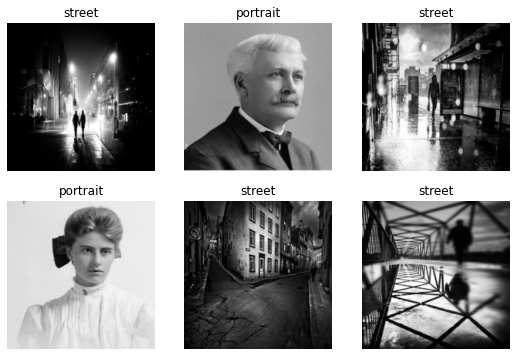

In [99]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

Here what each of the `DataBlock` parameters means:

    blocks=(ImageBlock, CategoryBlock),

The inputs to our model are images, and the outputs are categories (in this case, "bird" or "forest").

    get_items=get_image_files, 

To find all the inputs to our model, run the `get_image_files` function (which returns a list of all image files in a path).

    splitter=RandomSplitter(valid_pct=0.2, seed=42),

Split the data into training and validation sets randomly, using 20% of the data for the validation set.

    get_y=parent_label,

The labels (`y` values) is the name of the `parent` of each file (i.e. the name of the folder they're in, which will be *bird* or *forest*).

    item_tfms=[Resize(192, method='squish')]

Before training, resize each image to 192x192 pixels by "squishing" it (as opposed to cropping it).

Now we're ready to train our model. The fastest widely used computer vision model is `resnet18`. You can train this in a few minutes, even on a CPU! (On a GPU, it generally takes under 10 seconds...)

`fastai` comes with a helpful `fine_tune()` method which automatically uses best practices for fine tuning a pre-trained model, so we'll use that.

In [100]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.625315,0.125114,0.048077,01:35


epoch,train_loss,valid_loss,error_rate,time
0,0.135284,0.146744,0.043269,01:35
1,0.083608,0.004048,0.000000,01:35
2,0.047924,0.002220,0.000000,01:35


Generally when I run this I see 100% accuracy on the validation set (although it might vary a bit from run to run).

"Fine-tuning" a model means that we're starting with a model someone else has trained using some other dataset (called the *pretrained model*), and adjusting the weights a little bit so that the model learns to recognise your particular dataset. In this case, the pretrained model was trained to recognise photos in *imagenet*, and widely-used computer vision dataset with images covering 1000 categories) For details on fine-tuning and why it's important, check out the [free fast.ai course](https://course.fast.ai/).

## Step 3: Use our model (and build your own!)

Let's see what our model thinks about that street we downloaded at the start:

In [101]:
from PIL import Image
from fastai.vision.all import *

is_portrait,_,probs = learn.predict(PILImage.create('street.jpg'))
print(f"This is a: {is_portrait}.")
print(f"Probability it's a portrait: {probs[0]:.4f}")

This is a: street.
Probability it's a portrait: 0.0006


In [102]:
from PIL import Image
from fastai.vision.all import *

is_portrait,_,probs = learn.predict(PILImage.create('portrait.png'))
print(f"This is a: {is_portrait}.")
print(f"Probability it's a portrait: {probs[0]:.4f}")

This is a: portrait.
Probability it's a portrait: 1.0000


Good job, resnet18. :)

So, as you see, in the space of a few years, creating computer vision classification models has gone from "so hard it's a joke" to "trivially easy and free"!

It's not just in computer vision. Thanks to deep learning, computers can now do many things which seemed impossible just a few years ago, including [creating amazing artworks](https://openai.com/dall-e-2/), and [explaining jokes](https://www.datanami.com/2022/04/22/googles-massive-new-language-model-can-explain-jokes/). It's moving so fast that even experts in the field have trouble predicting how it's going to impact society in the coming years.

One thing is clear -- it's important that we all do our best to understand this technology, because otherwise we'll get left behind!

Now it's your turn. Click "Copy & Edit" and try creating your own image classifier using your own image searches!

If you enjoyed this, please consider clicking the "upvote" button in the top-right -- it's very encouraging to us notebook authors to know when people appreciate our work.